In [60]:
import sys
sys.path.append("../")

# Importing packages for EDA

In [61]:
from datasets import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Function to clean SAT data given the year as parameter

In [62]:
def get_SAT_by_District(year):
    # using the function from datasets.py to get sat df given year 
    SAT_df=get_SATScores(year)
    
    # as three years of data have different column names
    # they are cleaned in three if statement
    # doing this we can have only one fucntion to clean the data instead of three function
    
    # for the yar 2010
    if(year=='2010'):
        
        # droping the not available value for the given dataset
        SAT_df = SAT_df.dropna()
        
        # converting the column number_of_test_takers into integer
        SAT_df.number_of_test_takers=SAT_df.number_of_test_takers.astype('int')
    
    # for the year 2012
    if(year=='2012'):
        # renaming the columns for this dataseta as of 2010 dataset to avoid inconsistencies
        SAT_df=SAT_df.rename(index=str, columns={"num_of_sat_test_takers": "number_of_test_takers", "sat_critical_reading_avg_score": "critical_reading_mean","sat_math_avg_score":"mathematics_mean","sat_writing_avg_score":"writing_mean"})
        
        # as this data set has the value of 's' for not avaliabl data
        # dropping all the rows with value 's'
        SAT_df = SAT_df[SAT_df.critical_reading_mean != 's']
        
        # converting the column number_of_test_takers into integer
        SAT_df.number_of_test_takers=SAT_df.number_of_test_takers.astype('int')
        
    # for the year 2015
    if(year=='2015'):
        
        # as this data set had other informatin which was not needed, we are only using the required ones
        SAT_df = SAT_df[['School ID','School Name','Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']]
        
        # renaming the columns for this dataseta as of 2010 dataset to avoid inconsistencies
        SAT_df=SAT_df.rename(index=str, columns={"School ID":"dbn","School Name":"school_name", "Average Score (SAT Reading)": "critical_reading_mean","Average Score (SAT Math)":"mathematics_mean","Average Score (SAT Writing)":"writing_mean"})
        
        # dorping rows with un available dataset
        SAT_df=SAT_df.dropna()
        
        
    # converting the column critical_reading_means into integer
    SAT_df.critical_reading_mean = SAT_df.critical_reading_mean.astype('int')
    
    # converting the column mathematics_mean into integer
    SAT_df.mathematics_mean= SAT_df.mathematics_mean.astype('int')
    
    # converting the column writing_mean into integer
    SAT_df.writing_mean = SAT_df.writing_mean.astype('int')
    
    
    # as the datset had score for three components : reading, writing and maths 
    # adding all of them to get the combined score
    SAT_df['combined_score'] = SAT_df['critical_reading_mean']+SAT_df['mathematics_mean']+SAT_df['writing_mean']

    # as 2015 didnot had the column : for total number of test takers 
    # using a for loop to avoid error
    if(year=='2015'):
        SAT_df = SAT_df[['dbn','school_name','combined_score']]
    else:
        SAT_df = SAT_df[['dbn','school_name','combined_score','number_of_test_takers']]
    
    # as district is the first to characters of the DBN slicing it to get district
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    # converting district into integer
    SAT_df.district=SAT_df.district.astype('int')
    
    # initalizing a new dataframe to return
    SAT_DF_District=pd.DataFrame()
    
    # as the year 2015 didnt had columsn for total takes using a condition to avoid errors
    if(year !='2015'):
        
        # adding all the total takers in a district 
        SAT_DF_District['Total_Takers']=SAT_df.groupby('district')['number_of_test_takers'].sum()
    
    # getting mean of the sat score for all schools in a single district because we try to see perforance of a district
    SAT_DF_District['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    
    SAT_DF_District['District']=SAT_DF_District.index
    
    # converting columns district as integer
    SAT_DF_District.District=SAT_DF_District.District.astype('int')
    
    
    # resetting te index
    SAT_DF_District.reset_index(drop=True, inplace=True)
    
    # getting onyl the required columsn
    # using a conditional statement because 2015 dosent have the column for total takers
    if(year=='2015'):
        SAT_DF_District = SAT_DF_District[['District','Combined_SAT_scores']]
    else:
        SAT_DF_District = SAT_DF_District[['District','Total_Takers','Combined_SAT_scores']]
    
    # returning two datasets with schools and districts
    # SAT_DF_Disctirct: Average SAT scores for each districts
    # SAT_df : Average SAT score for each schools
    return SAT_DF_District,SAT_df





## Getting SAT data for 2010

In [63]:
SAT_df_2010,SAT_df_2010_by_Schools=get_SAT_by_District('2010')

#only looking upto district 32
SAT_df_2010 = SAT_df_2010[SAT_df_2010.District < 75]


## Getting SAT data for 2012

In [64]:
SAT_df_2012,SAT_df_2012_by_Schools=get_SAT_by_District('2012')

#only looking upto district 32
SAT_df_2012 = SAT_df_2012[SAT_df_2012.District < 75]

## Getting SAT data for 2015

In [65]:
SAT_df_2015,SAT_df_2015_by_Schools=get_SAT_by_District('2015')

## Sorting the data based on sat scores 

In [66]:
SAT_df_2010 = SAT_df_2010.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2012 = SAT_df_2012.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2015 = SAT_df_2015.sort_values(['Combined_SAT_scores'],ascending=False)

SAT_df_2010_by_Schools = SAT_df_2010_by_Schools.sort_values(['combined_score'],ascending=False)
SAT_df_2012_by_Schools = SAT_df_2012_by_Schools.sort_values(['combined_score'],ascending=False)
SAT_df_2015_by_Schools = SAT_df_2015_by_Schools.sort_values(['combined_score'],ascending=False)



In [67]:
# observing the results for schools with highest SAT scores for 2010
SAT_df_2010_by_Schools.head()

,dbn,school_name,combined_score,number_of_test_takers,district
42,02M475,STUYVESANT HIGH SCHOOL,2087,804,2
185,10X445,BRONX HIGH SCHOOL OF SCIENCE,1960,683,10
442,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,1928,287,31
384,25Q525,Townsend Harris High School at Queens College,1923,273,25
193,10X696,HS of American Studies at Lehman College,1884,74,10


In [68]:
# observing the results for schools with highest SAT scores for 2010
SAT_df_2012_by_Schools.head()

,dbn,school_name,combined_score,number_of_test_takers,district
48,02M475,STUYVESANT HIGH SCHOOL,2096,832,2
198,10X445,BRONX HIGH SCHOOL OF SCIENCE,1969,731,10
459,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953,227,31
206,10X696,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920,92,10
396,25Q525,TOWNSEND HARRIS HIGH SCHOOL,1910,278,25


In [69]:
# observing the results for schools with highest SAT scores for 2010
SAT_df_2015_by_Schools.head()

,dbn,school_name,combined_score,district
105,02M475,Stuyvesant High School,2144,2
203,10X445,Bronx High School of Science,2041,10
110,31R605,Staten Island Technical High School,2041,31
208,10X696,High School of American Studies at Lehman College,2013,10
385,25Q525,Townsend Harris High School,1981,25


# Visualization of top 20 schools for 2010, 2012, 2015

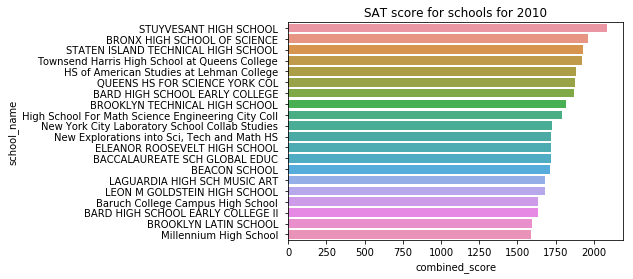

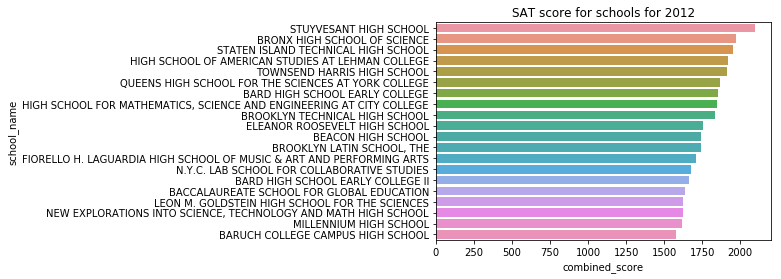

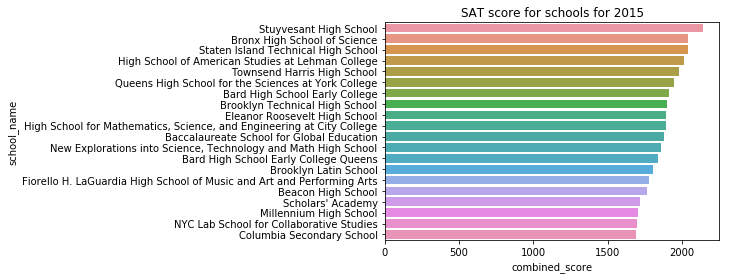

In [70]:
BAR_PLOT = 20

sns.barplot(y=SAT_df_2010_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2010_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2010_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2010')
plt.show()

sns.barplot(y=SAT_df_2012_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2012_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2012_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2012')
plt.show()

sns.barplot(y=SAT_df_2015_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2015_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2015_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2015')
plt.show()

In [71]:
# observing districts with high SAT scores for 2010
SAT_df_2010.head()

,District,Total_Takers,Combined_SAT_scores
21,22,1906,1424.000000
30,31,2552,1413.777778
25,26,2724,1395.400000
29,30,1242,1388.571429
27,28,2079,1361.250000


In [72]:
# observing districts with high SAT scores for 2012
SAT_df_2012.head()

,District,Total_Takers,Combined_SAT_scores
21,22,1968,1389.400000
25,26,3039,1377.600000
30,31,3025,1359.166667
29,30,1546,1339.250000
27,28,2197,1336.727273


In [73]:
# observing districts with high SAT scores for 2010
SAT_df_2015.head()

,District,Combined_SAT_scores
21,22,1524.000000
0,1,1447.666667
30,31,1439.000000
29,30,1425.444444
24,25,1421.625000


# Visualizing districts with igh SAT scores for  for 2010, 2012, 2015

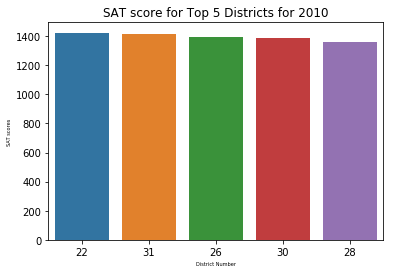

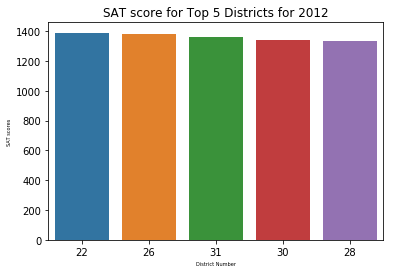

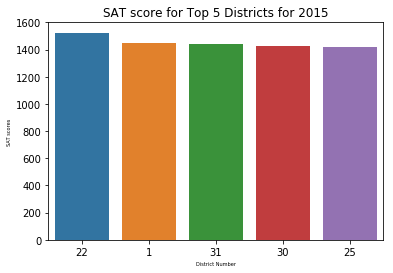

In [74]:
Slicing=5
sns.barplot(x=SAT_df_2010.District[:Slicing], y=SAT_df_2010.Combined_SAT_scores[:Slicing],order=SAT_df_2010.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2010')
plt.show()

sns.barplot(x=SAT_df_2012.District[:Slicing], y=SAT_df_2012.Combined_SAT_scores[:Slicing],order=SAT_df_2012.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2012')
plt.show()

sns.barplot(x=SAT_df_2015.District[:Slicing], y=SAT_df_2015.Combined_SAT_scores[:Slicing],order=SAT_df_2015.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2015')
plt.show()

# Violent Incident Data for NYC High Schools for 2010-2015

In [76]:
# Function to clean the data given the API for the data
def Clean_Incident(link):
    # reading the data as csv form
    df=pd.read_csv(link)
    
    # as we are focusing High Scholls only 
    df = df[df['Grade Organization']=='Senior High']
    
    # dropping the unnecessary columns
    df = df.drop(['County', 'BEDS Code', 'Need/Resource Category', 'School Type', 'Enrollment'], axis=1)
    
    # adding each form of incident to get total incident data
    df['Incident Total'] = df.iloc[:, -41:].sum(axis=1)
    
    # converting school name to upper case for consistencies
    df['School Name']=df['School Name'].str.upper()
    
    # returning the cleaned dataset
    return df


In [77]:
# calling the above funtion to get cleaned data
Incident_df_10_11=Clean_Incident('https://data.cityofnewyork.us/api/views/cznr-hmrv/rows.csv?accessType=DOWNLOAD')
Incident_df_11_12=Clean_Incident('https://data.cityofnewyork.us/api/views/wks3-66bn/rows.csv?accessType=DOWNLOAD')
Incident_df_12_13=Clean_Incident('https://data.cityofnewyork.us/api/views/imfa-v5pv/rows.csv?accessType=DOWNLOAD')
Incident_df_13_14=Clean_Incident('https://data.cityofnewyork.us/api/views/mq9d-au8i/rows.csv?accessType=DOWNLOAD')
Incident_df_14_15=Clean_Incident('https://data.cityofnewyork.us/api/views/jzt2-2f7h/rows.csv?accessType=DOWNLOAD')

In [84]:
# getting school name with DBN to merge it with violent inicdent data 
School_DBN= pd.read_csv('https://data.cityofnewyork.us/api/views/icps-nwdu/rows.csv?accessType=DOWNLOAD')
School_DBN=School_DBN[['DBN','School Name']]
School_DBN=School_DBN.drop_duplicates()

# Merging two datas sets to get DBN's for Violent Incident Data

In [86]:
Incident_df_10_11_w_DBN=pd.merge(School_DBN,Incident_df_10_11,on='School Name')
Incident_df_11_12_w_DBN=pd.merge(School_DBN,Incident_df_11_12,on='School Name')
Incident_df_12_13_w_DBN=pd.merge(School_DBN,Incident_df_12_13,on='School Name')
Incident_df_13_14_w_DBN=pd.merge(School_DBN,Incident_df_13_14,on='School Name')
Incident_df_14_15_w_DBN=pd.merge(School_DBN,Incident_df_14_15,on='School Name')

Our initial approach for this dataset was we wanted to use it as a feature in out model, but this dataset didnt had DBN information for each schools, so we decied to merge it with an other datset which has schools name and their respective DBN. Below is the visualization for these dataset just to see which schools have high violent incident occuring.

In [96]:
# sorting the values based on high number of incidents
Incident_df_10_11_w_DBN = Incident_df_10_11_w_DBN.sort_values(['Incident Total'],ascending=False)
Incident_df_11_12_w_DBN = Incident_df_11_12_w_DBN.sort_values(['Incident Total'],ascending=False)
Incident_df_12_13_w_DBN = Incident_df_12_13_w_DBN.sort_values(['Incident Total'],ascending=False)
Incident_df_13_14_w_DBN = Incident_df_13_14_w_DBN.sort_values(['Incident Total'],ascending=False)
Incident_df_14_15_w_DBN = Incident_df_14_15_w_DBN.sort_values(['Incident Total'],ascending=False)

# Visualization for 20 schools with most violent incident from 2010-2015

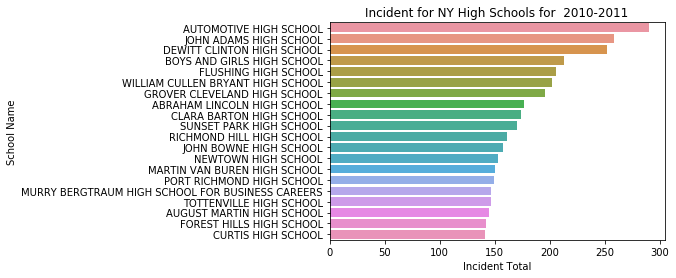

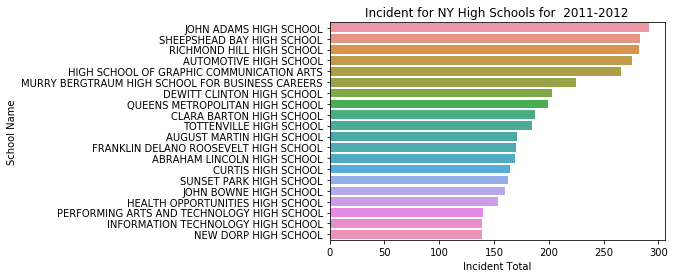

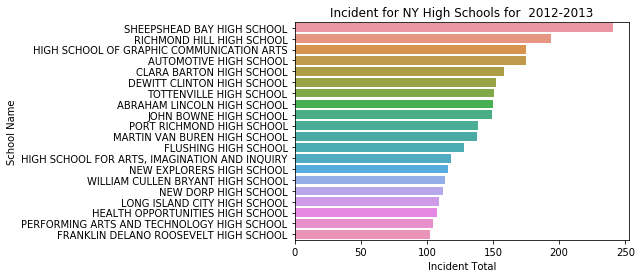

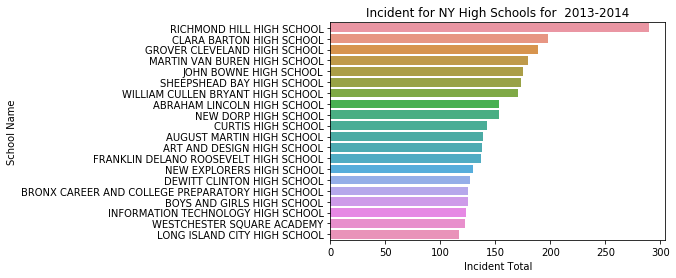

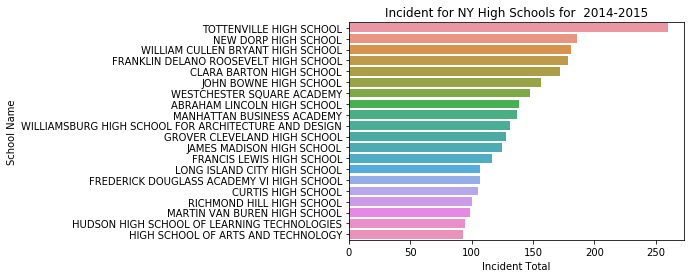

In [97]:
BAR_PLOT = 20

sns.barplot(y=Incident_df_10_11_w_DBN[:BAR_PLOT]['School Name'],
            x=Incident_df_10_11_w_DBN[:BAR_PLOT]['Incident Total'])
plt.title('Incident for NY High Schools for  2010-2011')
plt.show()

sns.barplot(y=Incident_df_11_12_w_DBN[:BAR_PLOT]['School Name'],
            x=Incident_df_11_12_w_DBN[:BAR_PLOT]['Incident Total'])
plt.title('Incident for NY High Schools for  2011-2012')
plt.show()

sns.barplot(y=Incident_df_12_13_w_DBN[:BAR_PLOT]['School Name'],
            x=Incident_df_12_13_w_DBN[:BAR_PLOT]['Incident Total'])
plt.title('Incident for NY High Schools for  2012-2013')
plt.show()

sns.barplot(y=Incident_df_13_14_w_DBN[:BAR_PLOT]['School Name'],
            x=Incident_df_13_14_w_DBN[:BAR_PLOT]['Incident Total'])
plt.title('Incident for NY High Schools for  2013-2014')
plt.show()

sns.barplot(y=Incident_df_14_15_w_DBN[:BAR_PLOT]['School Name'],
            x=Incident_df_14_15_w_DBN[:BAR_PLOT]['Incident Total'])
plt.title('Incident for NY High Schools for  2014-2015')
plt.show()

